In [1]:
# Vamos a desarrollar un programa de proyección y predicciones

# Librerias

import os
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import datetime as dt
import warnings

#Omitimos advertencias y precauciones 
warnings.filterwarnings("ignore", category = DeprecationWarning) 
warnings.filterwarnings("ignore")

#Cargamos los datos

data = pd.read_csv("Google.tsv", sep = "\t")

print(data, '\n')
print(data.columns, '\n')

         Date         Open         High          Low        Close
0    01/01/05    98,331429   102,266678    87,815842    97,444756
1    02/01/05    96,827072   107,995209    90,162048    93,643997
2    03/01/05    94,291573    94,570526    85,962791    89,917969
3    04/01/05    90,540634   111,950386    89,584213   109,589233
4    05/01/05   110,610405   138,680191    109,69384    138,11731
..        ...          ...          ...          ...          ...
184  05/01/20       1328,5         1441         1299  1438,920044
185  06/01/20  1418,390015   1475,94104   1347,01001  1413,609985
186  07/01/20  1411,099976   1586,98999  1409,819946  1482,959961
187  08/01/20  1486,640015  1659,219971  1458,650024  1634,180054
188  09/01/20  1636,630005  1733,180054  1497,359985    1519,3214

[189 rows x 5 columns] 

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object') 



In [2]:
#Datos del documento
#Número de datos (Date, Open, High, Low, Close)

#dates = pd.to_datetime(data['Date'], format='%m-%d-%y').dt.strftime('%Y-%m-%d') #Año, mes dia
#dates = np.array(dates, dtype='datetime64[D]') #Cambiamos el formato de dates
dates = pd.unique(data['Date'])
open_ = pd.unique(data['Open'])
high = pd.unique(data['High'])
low = pd.unique(data['Low'])
close = pd.unique(data['Close'])
close = np.array(close, dtype=np.str) #Cambiamos el formato de close por cadenas
close = [close_.replace(',', '.') for close_ in close] #Le quitamos la coma y le ponemos el punto
close = np.array(close, dtype=np.float64) #Cambiamos el formato de close por numeros flotantes

#Los imprimimos de manera individual

#print("DATE")
#print(dates, '\n')


#print("OPEN")
#print(open_, '\n')

#print("HIGH")
#print(high, '\n')

#print("LOW")
#print(low, '\n')

#print("CLOSE")
#print(close, '\n')



In [4]:

colors = ['g', 'k', 'b', 'm', 'r', 'dark blue']
linestyles = ['solid', # Same as (0, ()) or '-'
              'dotted', # Same as (0, (1, 1)) or '.'
              'dashed', # Same as '--'
              'dashdot'# Same as '-.'
              '',
              ':'
             ]

#Linestyles soportadas
#'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

#Agregamos la fecha final para proyecciones más adelantes

def plot_models(x, y, models, fname, 
                mx = None, ymax = None, xmin = None, 
                date_final = 2021):
    
    plt.figure(num=None, figsize=(8, 6))
    plt.clf()
    plt.scatter(x, y, s=10, color = 'teal')
    plt.title("Acciones de Google ", fontsize=20)  #Cambio titulo y tamaño
    plt.xlabel("Año", fontsize=15)
    plt.ylabel("Valor en Dolares", fontsize=15)
    
     #Fecha inicial y fecha final + 1
    #y de years, un año tiene 12 meses
    corrector = 0
    years = []
    for a in x:
        if a % 12 == 0 and a > 0:
            corrector += 1
        xa = corrector + 2005
        years.append(xa)
          
    if models:
        if mx is None:
            mx = np.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)
            
        plt.legend(["d=%i" % m.order for m in models], loc="upper left")
        
    
    #y * 12 * 5  for y in range(len(years))
    #Se toma los 12 semes en intervalos de 5 años
    if date_final is None:
        plt.xticks([y * 12 * 5  for y in range(len(years))], 
                   ['%i' % w for w in range(2005,date_final,5)])
    else:
        #Año entregado más 1, por cuestiones del for
        date_final = date_final + 2001
        plt.xticks([y * 12 * 5  for y in range(len(years))], 
                   ['%i' % w for w in range(2005,date_final,5)])
         
    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
        
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

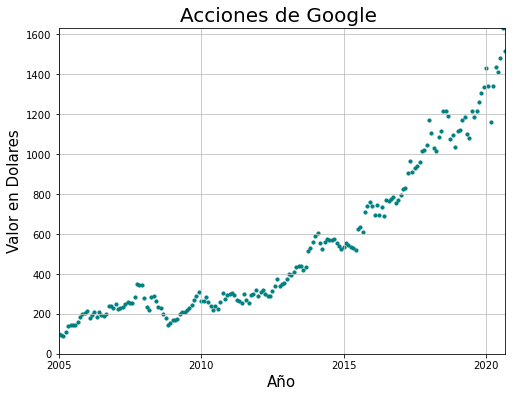

In [5]:
# Primera mirada a los datos

years = [m for m in range(len(dates))]
#print(years)
#years = [m.year for m in dates.astype(object)]
#print(years)
plot_models(years, close, None, os.path.join("Primera_Entrada.png"))

Parámetros del modelo fp1: [  6.48366888 -63.21621339]
Error del modelo fp1: [4152297.36700226]


Parámetros del modelo fp2: [ 5.06271090e-02 -3.03422762e+00  2.33424894e+02]
Error del modelo fp2: [718758.40473098]


Parámetros del modelo fp3: [1.49252477e-04 8.53791041e-03 1.22492128e-01 1.84626677e+02]
Error del modelo fp3: [650249.43023229]


Parámetros del modelo fp10: [ 2.28255714e-17 -1.45652527e-14  3.32048061e-12 -2.58908459e-10
 -1.47992626e-08  3.73486842e-06 -2.20400584e-04  6.29549737e-03
 -2.59277399e-01  1.09960793e+01  8.74594394e+01]
Error del modelo fp10: [432382.15336145]


Parámetros del modelo fp100: [-0.00000000e+000  0.00000000e+000 -0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000 -0.00000000e+000
 -0.00000000e+000  0.00000000e+000 -0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000 -0.00000000e+000  0.00000000e+000
  0.00000000e+000 -0.000000

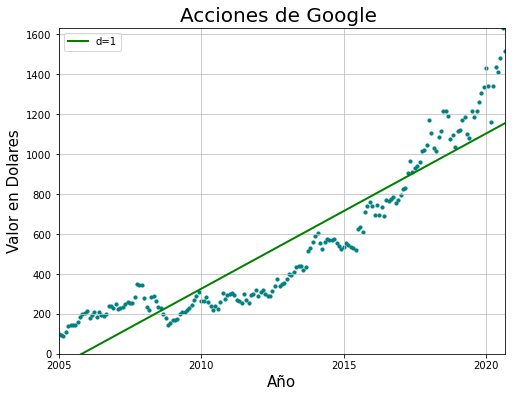

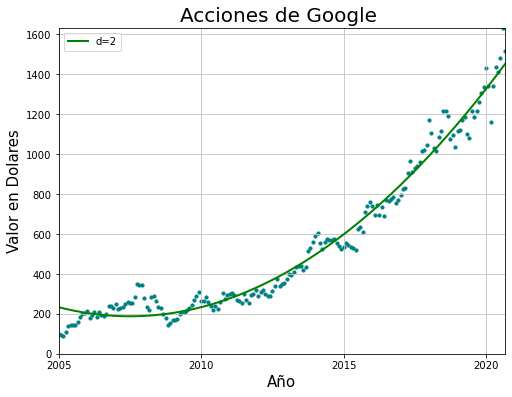

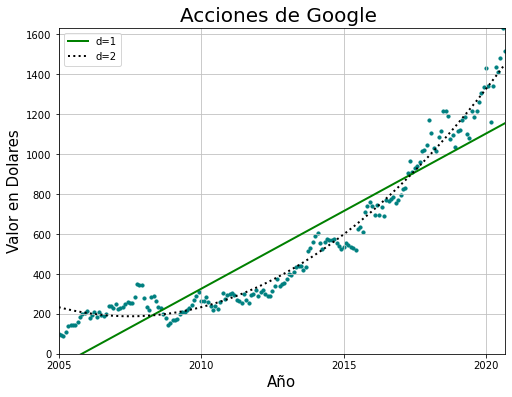

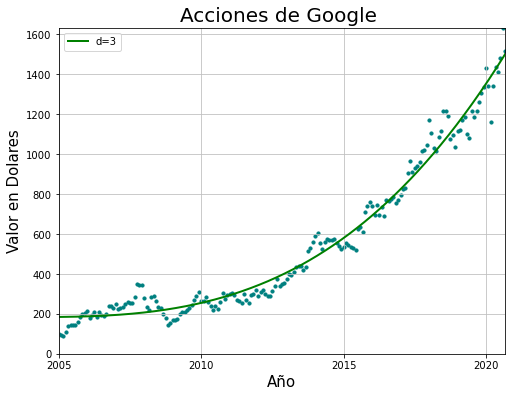

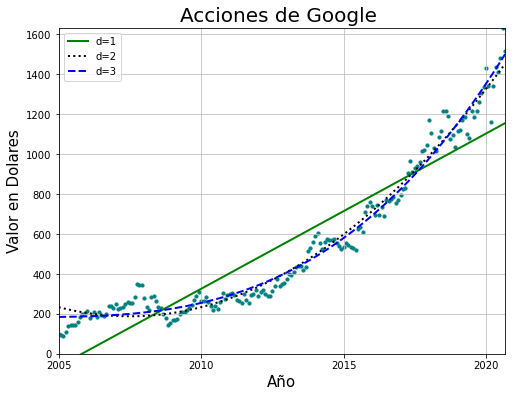

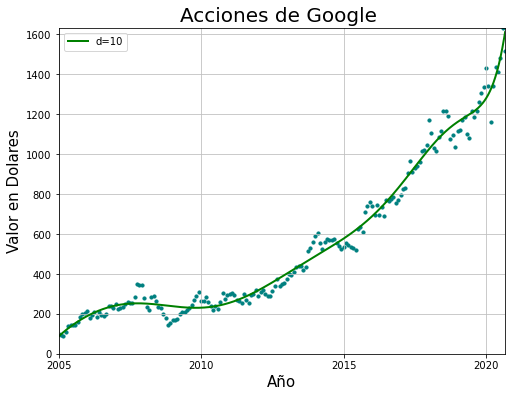

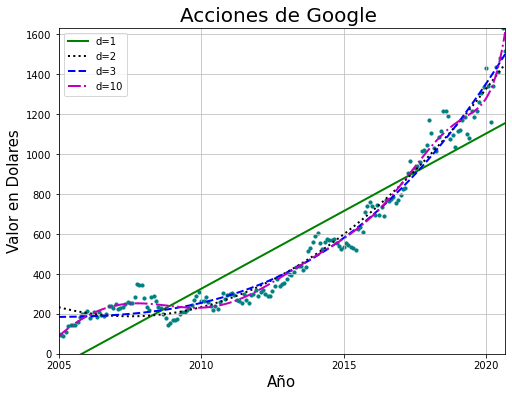

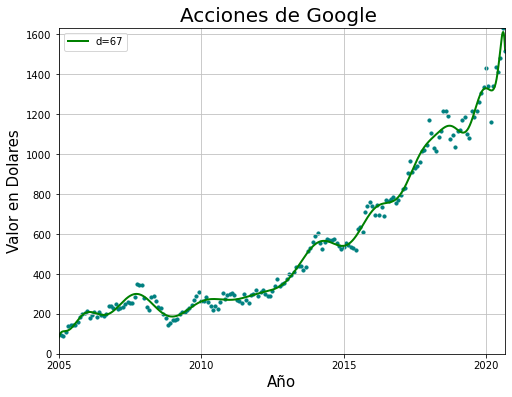

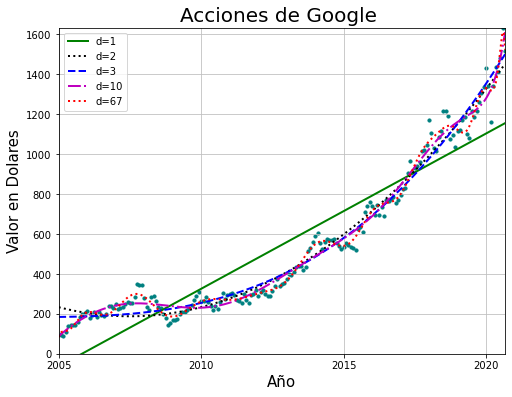

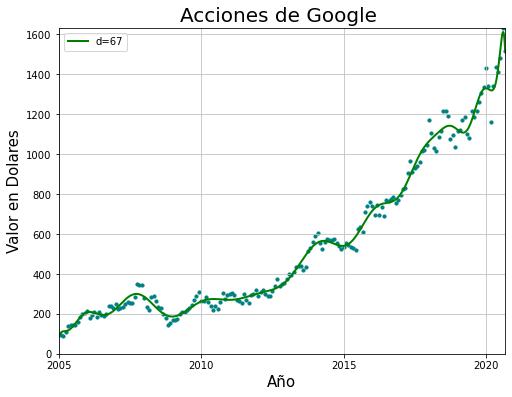

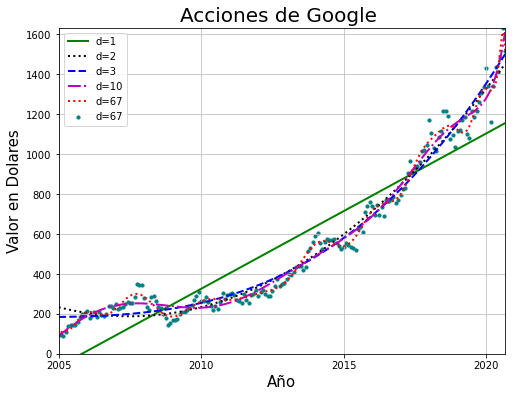

In [6]:
# Crea y dibuja los modelos de datos

fp1, res1, rank1, sv1, rcond1 = np.polyfit(years, close, 1, full=True)
print("Parámetros del modelo fp1: %s" % fp1)
print("Error del modelo fp1:", res1)
print('\n')

fp2, res2, rank2, sv2, rcond2 = np.polyfit(years, close, 2, full=True)
print("Parámetros del modelo fp2: %s" % fp2)
print("Error del modelo fp2:", res2)
print('\n')

fp3, res3, rank3, sv3, rcond3 = np.polyfit(years, close, 3, full=True)
print("Parámetros del modelo fp3: %s" % fp3)
print("Error del modelo fp3:", res3)
print('\n')

fp10, res10, rank10, sv10, rcond10 = np.polyfit(years, close, 10, full=True)
print("Parámetros del modelo fp10: %s" % fp10)
print("Error del modelo fp10:", res10)
print('\n')

fp100, res100, rank100, sv100, rcond100 = np.polyfit(years, close, 100, full=True)
print("Parámetros del modelo fp100: %s" % fp100)
print("Error del modelo fp100:", res100)
print('\n')

fp110, res110, rank110, sv110, rcond110 = np.polyfit(years, close, 110, full=True)
print("Parámetros del modelo fp110: %s" % fp110)
print("Error del modelo fp110:", res110)
print('\n')

f1 = sp.poly1d(fp1)
f2 = sp.poly1d(fp2)
f3 = sp.poly1d(np.polyfit(years, close, 3))
f10 = sp.poly1d(np.polyfit(years, close, 10))
f100 = sp.poly1d(np.polyfit(years, close, 100))
f110 = sp.poly1d(np.polyfit(years, close, 110))

# Se grafican los modelos

plot_models(years, close, [f1], os.path.join("Segunda_entrada.png"))

plot_models(years, close, [f2], os.path.join("Tercer_entrada.png"))
plot_models(years, close, [f1, f2], os.path.join("Tercer_entrada_combinada.png"))

plot_models(years, close, [f3], os.path.join("Cuarta_entrada.png"))
plot_models(years, close, [f1, f2, f3], os.path.join("Cuarta_entrada_combinada.png"))

plot_models(years, close, [f10], os.path.join("Quinta_entrada.png"))
plot_models(years, close, [f1, f2, f3, f10], os.path.join("Quinta_entrada_combinada.png"))

plot_models(years, close, [f100], os.path.join("Sexta_entrada.png"))
plot_models(years, close, [f1, f2, f3, f10, f100], os.path.join("Sexta_entrada_combinada.png"))

plot_models(years, close, [f110], os.path.join("Septima_entrada.png"))
plot_models(years, close, [f1, f2, f3, f10, f100, f110], os.path.join("Septima_entrada_combinada.png"))

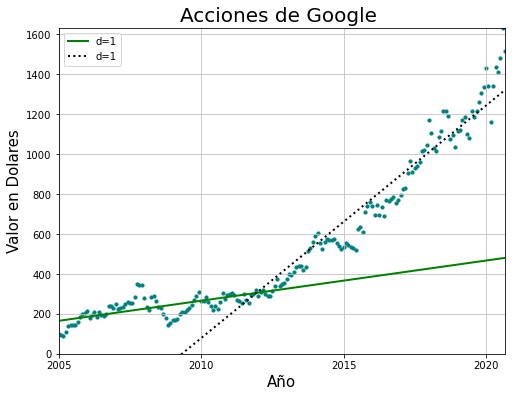

In [10]:
# Ajusta y dibuja un modelo utilizando el conocimiento del punto de inflexión
#cada cinco años de doce meses

inflexion = 5 * 12 
years_a = years[:int(inflexion)]
years_b = years[int(inflexion):]
close_a = close[:int(inflexion)]
close_b = close[int(inflexion):]

# Se grafican dos líneas rectas

fa = sp.poly1d(np.polyfit(years_a, close_a, 1))
fb = sp.poly1d(np.polyfit(years_b, close_b, 1))

# Se presenta el modelo basado en el punto de inflexión

plot_models(years, close, [fa, fb], os.path.join("Inflexion.png"))

In [11]:
# Función de error
def error(f, x, y):
    return np.sum((f(x) - y) ** 2)

In [12]:
# Se imprimen los errores

print("Errores para el conjunto completo de datos:")
for f in [f1, f2, f3, f10, f100, f110]:
    print("Error d = %i: %f" % (f.order, error(f, years, close)))


print("\nErrores solamente después del punto de inflexión")
for f in [f1, f2, f3, f10, f100, f110]:
    print("Error d = %i: %f" % (f.order, error(f, years_b, close_b)))
    
print("\nError de inflexión = %f" % (error(fa, years_a, close_a) + error(fb, years_b, close_b)))

Errores para el conjunto completo de datos:
Error d = 1: 4152297.367002
Error d = 2: 718758.404731
Error d = 3: 650249.430232
Error d = 10: 432382.153361
Error d = 67: 229124.780226
Error d = 67: 229124.590521

Errores solamente después del punto de inflexión
Error d = 1: 3131394.945936
Error d = 2: 445006.215123
Error d = 3: 464191.949225
Error d = 10: 340607.911557
Error d = 67: 190478.590605
Error d = 67: 190478.280152

Error de inflexión = 1208738.095540


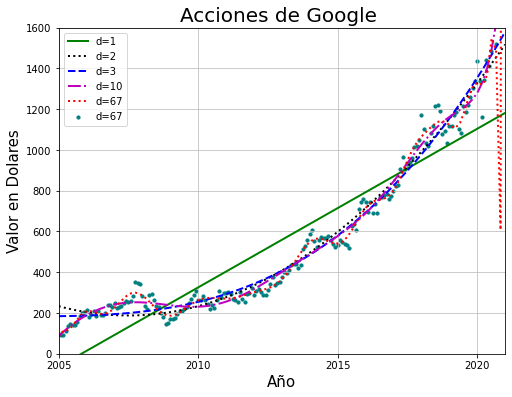

In [13]:
# Se extrapola de modo que se proyecten respuestas en el futuro
#16 años de duración de 12 meses = 16 * 12

plot_models(years, close, [f1, f2, f3, f10, f100, f110],os.path.join("Proyeccion.png"),
            mx = np.linspace(0 * 12, 16 * 12, 100), 
            ymax = 1600, xmin = 0 * 12)

fbt2(x)= 
         2
0.05549 x - 3.995 x + 269.4

fbt2(x)-100,000= 
         2
0.05549 x - 3.995 x - 3231

Prueba de error para después del punto de inflexión
2026


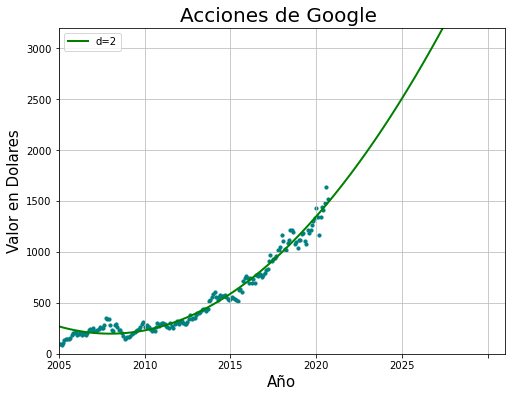

In [24]:
# Separa el entrenamiento de los datos de prueba

frac = 0.25 #Toma la cuarta parte de los datos
split_idx = int(frac * len(years_b))
shuffled = sp.random.permutation(list(range(len(years_b))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
years_b = np.array(years_b)

#fbt1 = sp.poly1d(np.polyfit(years_b[train], close_b[train], 1))
fbt2 = sp.poly1d(np.polyfit(years_b[train], close_b[train], 2))

print("fbt2(x)= \n%s" % fbt2)
print("\nfbt2(x)-100,000= \n%s" % (fbt2-3500))

#fbt3 = sp.poly1d(np.polyfit(years_b[train], close_b[train], 3))
#fbt10 = sp.poly1d(np.polyfit(years_b[train], close_b[train], 10))
#fbt100 = sp.poly1d(np.polyfit(years_b[train], close_b[train], 100))
#fbt110 = sp.poly1d(np.polyfit(years_b[train], close_b[train], 110))

print("\nPrueba de error para después del punto de inflexión")
#for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    #print("Error d = %i: %f" % (f.order, error(f, years_b[test], close_b[test])))
    
#plot_models(years, close, [fbt1, fbt2, fbt3, fbt10, fbt100, fbt110],os.path.join("Inflexion.png"),
#            mx = np.linspace(0 * 12, 16 * 12, 100), 
#            ymax = 1600, xmin = 0 * 12)
#Introduccimos el año que deseamos ver en la grafica
age_final = 26
plot_models(years, close, [fbt2],os.path.join("Inflexion.png"),
            mx = np.linspace(0 * 12, age_final * 12, 100), 
            ymax = 3200, xmin = 0 * 12, date_final = age_final)

In [ ]:
from scipy.optimize import fsolve
print(fbt2)
#Recordar monitoria

print(fbt2 - 3200)
alcanzado_max = fsolve(fbt2 - 3200, x0 = 2005) / 12
d = alcanzado_max[0] + 2005
print("\n3.200 Valor/mes esperados en la año %f" % d)

In [ ]:
5.991845